<a href="https://www.kaggle.com/code/zukhrakhongulomova/pytorch-workflow?scriptVersionId=177188644" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Pytorch Workflow

In [1]:
# time steps: 7:38:26 -- 8:00:00

## Notebook Imports

In [2]:
import torch
from torch import nn

import matplotlib.pyplot as plt

## Data Preparation and Loading

* Excel Spreadsheet
* Images of any kind
* Videos (Youtube)
* Audio (songs, podcasts)
* DNA
* Text

#### Machine Learning is a game of two parts:
1. Get data into a numerical reprentation.
2. Build a model to learn patterns in that numerical representation.

In [3]:
# Create parameters
weight = 0.7
bias = 0.3 

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

## Splitting data into Training and Test Sets

In [5]:
# Create a train/test split 
X_train, y_train = X[:40], y[:40]
X_test, y_test = X[40:], y[40:]

In [6]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={'size': 14})

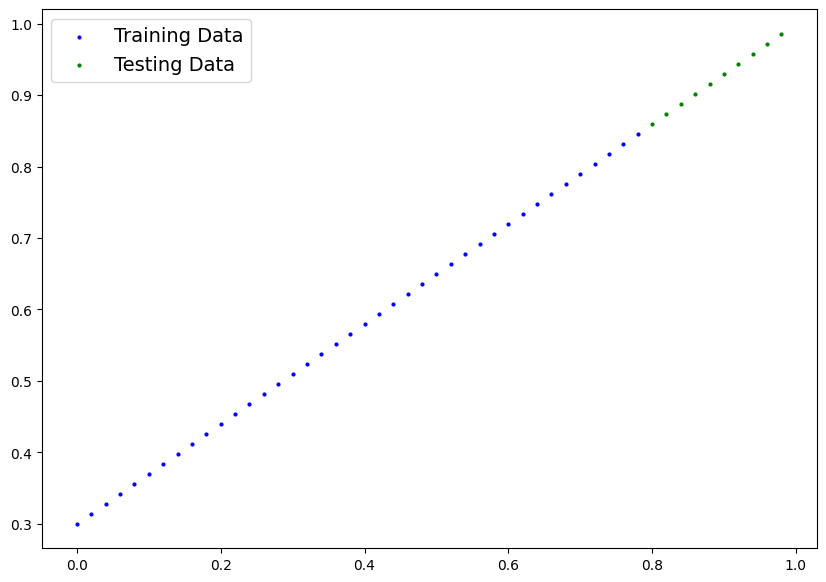

In [7]:
plot_predictions()

## Build Model

What our model does:
* Start with random values (weight & bias) 
* Look at the training data and adjust the random values to better represent (or get closer to) idelal values (weight & bias)  

Algorithms to use:
* Gradient Descent 
* Backpropagation

In [8]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), 
                                   requires_grad=True) 

        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), 
                                requires_grad=True) 

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### PyTorch Model Building Essentials

* **torch.nn** - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* **torch.nn.Parameter** - what parameters should our modle try and learn, often a PyTorch layer from torch.nn will set these for us
* **torch.nn.Module** - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* **torch.optim** - place where the optimizers are, they will help with gradient descent
* **def forward()** - all nn.Module subclasses require to overwrite forward(), this method defines what happens in the forward computation

### Contents of our PyTorch Model

We use `.parameters()` to check the parameters of the model

In [9]:
# Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making Prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.
<br>
When we pass data thourgh our model, it's going to run it through `forward()` method.

In [11]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

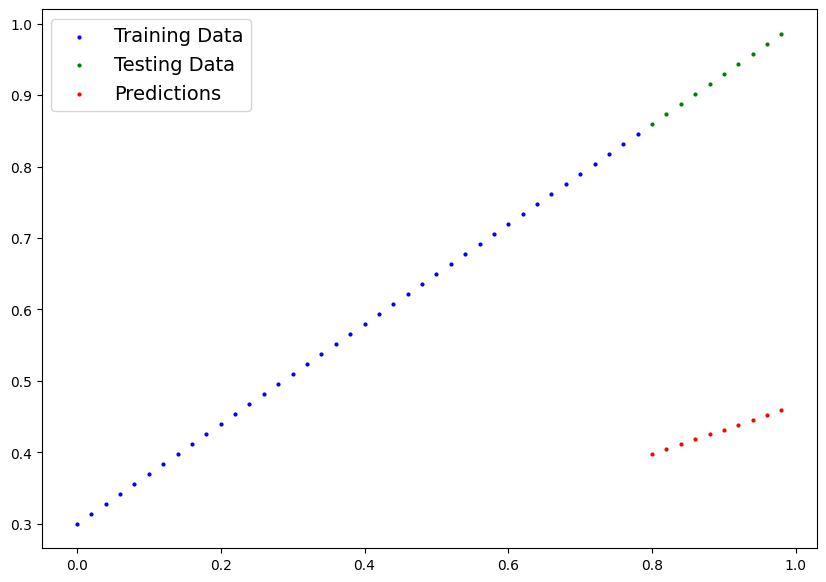

In [12]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better one.

One way to measure how poor or how wrong the models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas.

* **Loss function:** A function to measure how wrong the model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters (e.g weight & bias)

    * `params` - the model parameters to optimize
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimzer changes the parameters with each step.


In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # Stochastic Gradient Descent

### Training Loop and Testing Loop in PyTorch

Training Loop:
0. Loop through the data
1. Forward pass ( this involves data moving through our model's `forward()` functions) to make prdictions on propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards throuth the network to calculate the gradients of each of the parameters of the loss (**backprogation**) 
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [15]:
model_0.parameters()

<generator object Module.parameters at 0x795d3dbc0c80>

In [16]:
torch.manual_seed(42)
epochs = 130 # one loop through the data

for epoch in range(epochs):
    model_0.train() # train mode in PyTorch set 
    
    # 1. Forward pass
    y_preds_new = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_preds_new, y_train)
    
    # 3. Optimize zero grad
    optimizer.zero_grad()
    
    # 4. Backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default the optimizer changes will accumulate through the loop and we have to zero them 
    
    
    ### Testing
    model_0.eval()
    
    with torch.inference_mode(): # turns off gradient tracking
        # 1. Forward Pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741


In [17]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6295])), ('bias', tensor([0.3293]))])

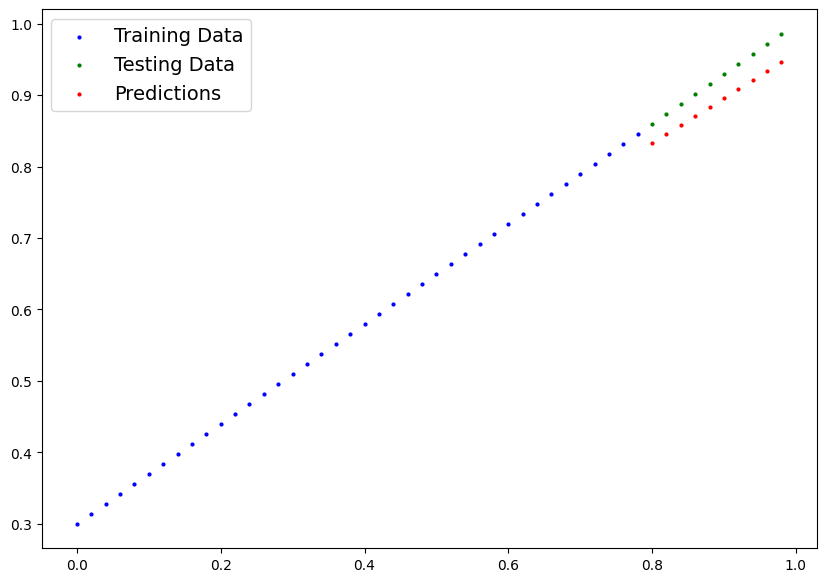

In [19]:
plot_predictions(predictions=y_pred_new)

## Saving a model in PyTorch 

Three main methods for saving and loading models in Pytorch:
* `torch.save()` -- allows to save a PyTorch object in Python's pickle format
* `torch.load()` -- allows to load a saved PyTorch object
* `torch.nn.Module.load_state_dict()` -- allows to load a model's saved state dictionary

In [20]:
# Saving our Pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = 'Pytorch_workflow.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [21]:
!ls -l models

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


total 4
-rw-r--r-- 1 root root 1550 May 12 09:26 Pytorch_workflow.pt


## Loading a PyTorch Model

In [22]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [23]:
# Predictions with our loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_preds = loaded_model(X_test)
    
loaded_preds

tensor([[0.8329],
        [0.8455],
        [0.8581],
        [0.8707],
        [0.8833],
        [0.8959],
        [0.9085],
        [0.9210],
        [0.9336],
        [0.9462]])

In [24]:
y_pred_new == loaded_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## PyTorch Workflow Loop

### Notebook Imports

Create device-agnostic code.
<br>
If there is an access to a GPU, the code will use it (faster computing)
<br>
If no GPU is available, the code will default to using CPU

In [25]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.2+cpu'

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### Data

In [27]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [28]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

### Pytorch Linear Model

In [29]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))